In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import display
# from sklearn.model_selection import cross_val_score
# from sklearn import metrics
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import StandardScaler
# from scipy import stats

%matplotlib inline
warnings.filterwarnings('ignore')

### 1. Import the function to download the dataset.

In [39]:
from sklearn.datasets import load_diabetes

In [40]:
diabetes = load_diabetes()

In [41]:
print(diabetes.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names'])


In [42]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [43]:
print(diabetes.feature_names)
print(diabetes.data.shape)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)


In [44]:
diabetes_pd = pd.DataFrame(diabetes.data)
diabetes_pd.columns = diabetes.feature_names
diabetes_pd.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [45]:
#adding column 11 which represents a quantitative measure of disease progression one year after baseline
diabetes_pd['diabetes'] = diabetes.target
diabetes_pd.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [46]:
pp.ProfileReport(diabetes_pd)

Number of variables,11
Number of observations,442
Total Missing (%),0.0%
Total size in memory,38.1 KiB
Average record size in memory,88.2 B
Numeric,10
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### 2a. What type of features of the data

In [47]:
diabetes_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age         442 non-null float64
sex         442 non-null float64
bmi         442 non-null float64
bp          442 non-null float64
s1          442 non-null float64
s2          442 non-null float64
s3          442 non-null float64
s4          442 non-null float64
s5          442 non-null float64
s6          442 non-null float64
diabetes    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


### 2b. Which features have the high correlation with the target

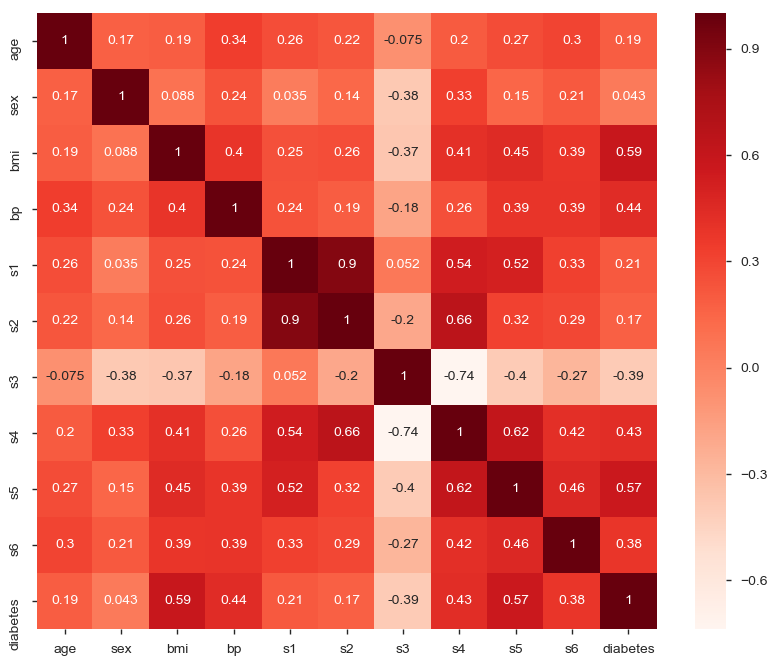

In [48]:
plt.figure(figsize=(10,8))
cor = diabetes_pd.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [49]:
cor['diabetes'].sort_values(ascending=False)

diabetes    1.000000
bmi         0.586450
s5          0.565883
bp          0.441484
s4          0.430453
s6          0.382483
s1          0.212022
age         0.187889
s2          0.174054
sex         0.043062
s3         -0.394789
Name: diabetes, dtype: float64

We're gonna assume here that correaltion value > 0.3 or > -0.3 has high correlation with the target variable. Hence the highly correlated variables with the target are:
1. bmi
2. s5
3. bp
4. s4
5. s6
6. s3

### 2c. Plot the correlation using scatter matrix.

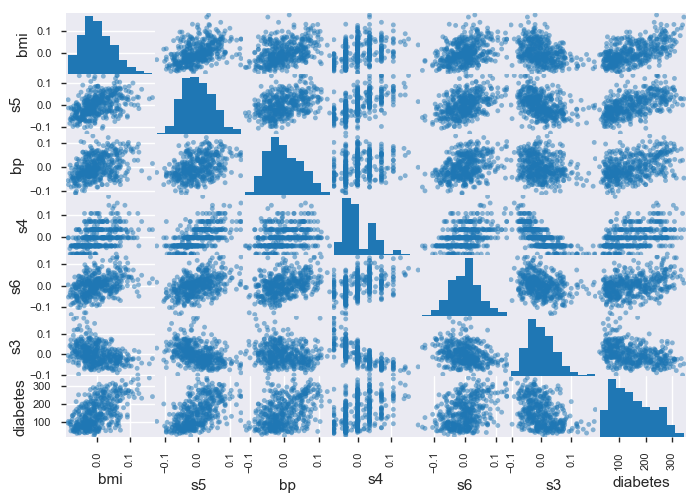

In [50]:
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
attr =['bmi', 's5', 'bp', 's4', 's6', 's3','diabetes']
scatter_matrix(diabetes_pd[attr])
plt.show()

Plotting scatter plot between 'bmi' and 'diabetes', 's5' and 'diabetes' as those two independent variables have the highest positive correlations with diabetes.

Text(0.5,1,'Relationship between bmi and diabetes')

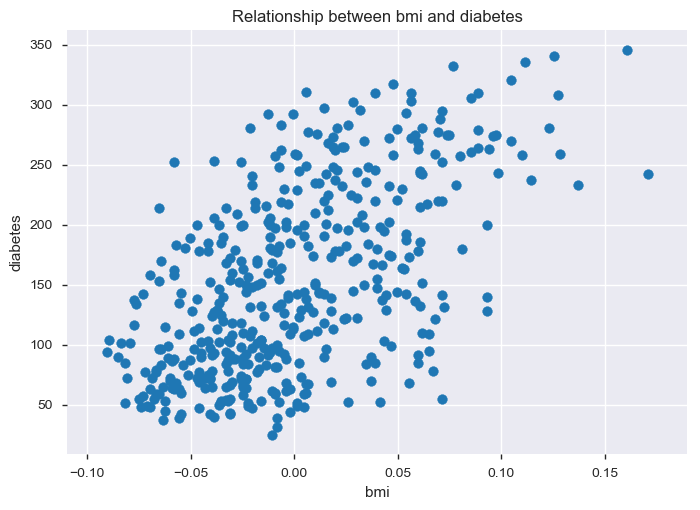

In [51]:
plt.scatter(diabetes_pd.bmi,diabetes_pd.diabetes)
plt.xlabel('bmi')
plt.ylabel('diabetes')
plt.title('Relationship between bmi and diabetes')

Text(0.5,1,'Relationship between s5 and diabetes')

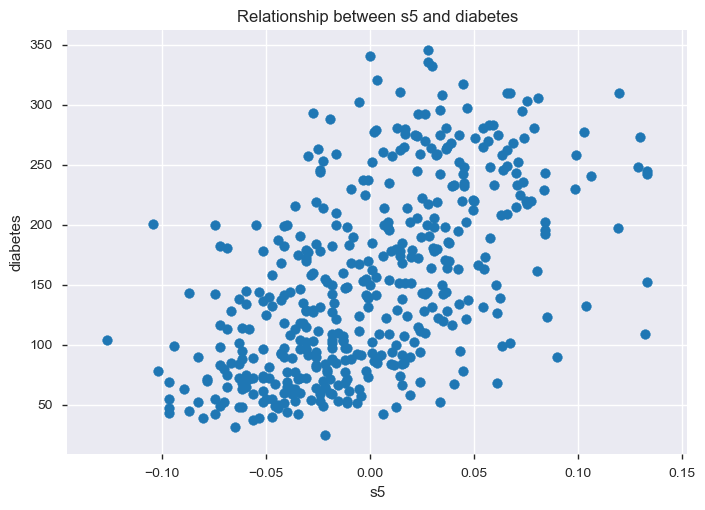

In [52]:
plt.scatter(diabetes_pd.s5,diabetes_pd.diabetes)
plt.xlabel('s5')
plt.ylabel('diabetes')
plt.title('Relationship between s5 and diabetes')

### 3. Split the dataset into training and testing sets.

In [53]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_pd.iloc[:,:-1], diabetes_pd.iloc[:,-1], test_size=0.2, random_state=0)

### 4. Develop the regression model using Linear Regression technique.


In [54]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)
print('Accuracy of the training model: %.2f' % regression.score(x_train, y_train))

Accuracy of the training model: 0.55


### 5. Print the estimated coefficients of the model.

In [55]:
print('Estimated intercept coefficients:', regression.intercept_)
print('\nNumber of coeffients:', len(regression.coef_))
print('\nCoefficients:', regression.coef_)

Estimated intercept coefficients: 152.5381335195406

Number of coeffients: 10

Coefficients: [ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]


### 6. Evaluate the regression model using mean absolute error.


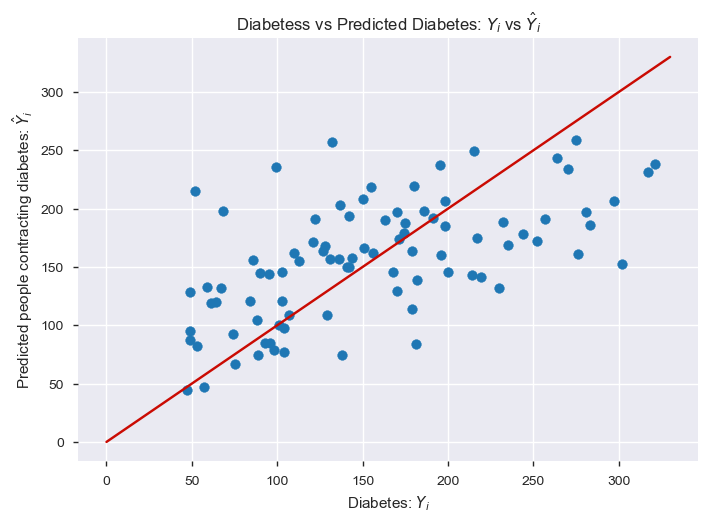

In [56]:
y_pred = regression.predict(x_test)
# plot prediction and actual data
plt.scatter(y_test, y_pred)
plt.xlabel('Diabetes: $Y_i$')
plt.ylabel('Predicted people contracting diabetes: $\hat{Y}_i$')
plt.title('Diabetess vs Predicted Diabetes: $Y_i$ vs $\hat{Y}_i$')
# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y, 'r')
plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

46.1742024187542


### 7. Evaluate the regression model using mean squared error and R2-squared.

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2-squared: %.4f" % r2_score(y_test, y_pred))

Mean squared error: 3424.32
R2-squared: 0.3322


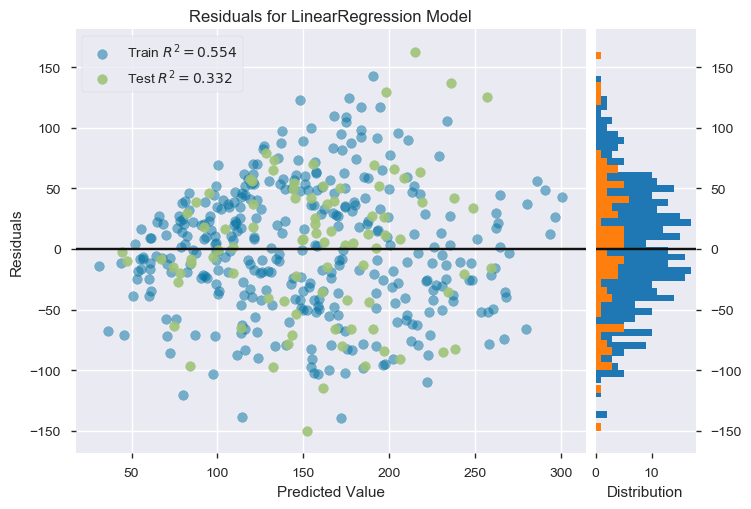

In [59]:
from yellowbrick.regressor import ResidualsPlot
res_plot = ResidualsPlot(regression)
res_plot.fit(x_train, y_train)
res_plot.score(x_test, y_test)
res_plot.poof()